Taken from pysheds tutorial: https://mattbartos.com/pysheds/catchment.html

In [8]:
from pysheds.grid import Grid
import matplotlib.pyplot as plt
import numpy as np

In [3]:
test_file = '/global/scratch/users/ann_scheliga/aux_dam_datasets/n30w120_con.tif'

In [4]:
# Instantiate grid from raster
grid = Grid.from_raster(test_file)
dem = grid.read_raster(test_file)

# Resolve flats and compute flow directions
inflated_dem = grid.resolve_flats(dem)
fdir = grid.flowdir(inflated_dem)

In [5]:
# Specify pour point
x, y = -111.484364 , 36.938206

# Delineate the catchment
catch = grid.catchment(x=x, y=y, fdir=fdir, xytype='coordinate')

# Plot the result
grid.clip_to(catch)
catch_view = grid.view(catch)

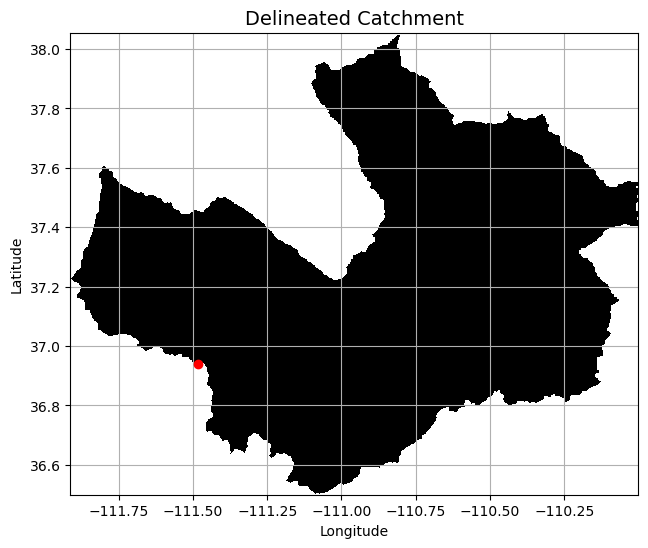

In [12]:
# Plot the catchment
fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)

plt.grid('on', zorder=0)
im = ax.imshow(np.where(catch_view, catch_view, np.nan), extent=grid.extent,
               zorder=1, cmap='Greys_r')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Delineated Catchment', size=14)

ax.plot(x, y, marker = 'o',color='red')

In [13]:
# Reset view
grid.viewfinder = fdir.viewfinder

# Compute accumulation
acc = grid.accumulation(fdir)

# Snap pour point to high accumulation cell
x_snap, y_snap = grid.snap_to_mask(acc > 1000, (x, y))


# Delineate the catchment
catch = grid.catchment(x=x_snap, y=y_snap, fdir=fdir, xytype='coordinate')

# Plot the result
grid.clip_to(catch)
catch_view = grid.view(catch)

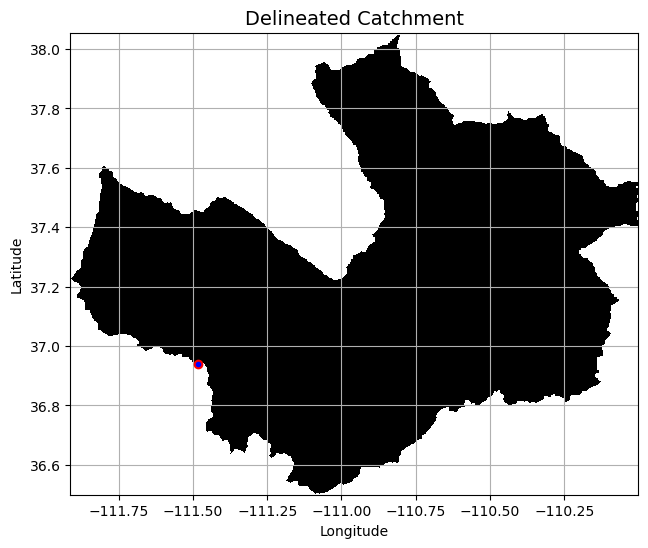

In [15]:
# Plot the catchment
fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)

plt.grid('on', zorder=0)
im = ax.imshow(np.where(catch_view, catch_view, np.nan), extent=grid.extent,
               zorder=1, cmap='Greys_r')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Delineated Catchment', size=14)

ax.plot(x, y, marker = 'o',color='red')
ax.plot(x_snap, y_snap, marker = '.',color='blue')
